# Classificação de Status de Saúde Mental a Partir da Análise de Comentários (Documentos)

Para este projeto, foi escolhido o conjunto de dados chamado "Sentiment Analysis for Mental Health", disponível no Kaggle. Este dataset é uma coleção de declarações textuais rotuladas com sete diferentes status de saúde mental, incluindo "Normal", "Depressão", "Suicidal", "Ansiedade", "Estresse", "Bipolar" e "Transtorno de Personalidade".

Este conjunto de dados é derivado de várias fontes, como postagens em mídias sociais, Reddit, Twitter, entre outras, permitindo uma ampla análise do comportamento textual relacionado à saúde mental. Seu uso comercial se estende a empresas e pesquisadores que visam desenvolver soluções tecnológicas, como chatbots de suporte, além de análise de sentimentos com foco na detecção de transtornos mentais.

Algumas finalidades as quais o dataset se destina:

- Desenvolvimento de chatbots inteligentes voltados para o suporte à saúde mental.
- Análise de sentimentos para identificar tendências de saúde mental em grupos sociais.
- Pesquisa acadêmica sobre padrões de saúde mental com base em análise de texto.

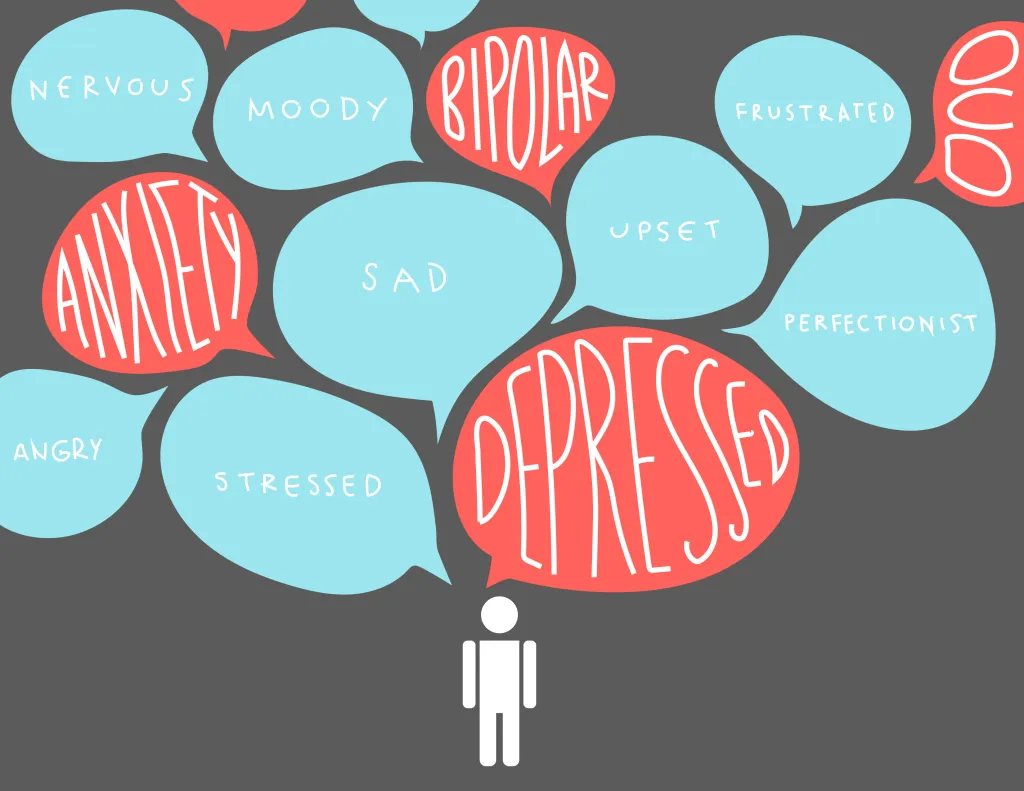

## Bibliotecas a Serem Utilizadas 

In [196]:
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

## Importação dos Dados e Pré-processamento

In [285]:
df = pd.read_csv('./mental_health_analysis.csv')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.sample(n=5)

,id,statement,status
32415,32415,and you're mine forever.,Normal
52940,52940,Panic attacks have returned - what to do? I’ve...,Anxiety
26466,26466,As the title says. My life is a mistake in its...,Suicidal
19551,19551,I hate warmth and going inside so its not goin...,Depression
28047,28047,I also want to set the record straight with my...,Stress


In [201]:
df = df[df['statement'].notnull()]

custom = False
custom_stopwords = ['im', 'feel', 'like', 'get', 'dont', 'want', 'time', 'cannot', 'go']
final_stopwords = list(stopwords.words('english'))

if custom:
    final_stopwords = list(nltk_stopwords.union(custom_stopwords))

In [203]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split() 
    tokens = [word for word in tokens if word not in final_stopwords]

    stemmer = PorterStemmer() # stemming
    lemmatizer = WordNetLemmatizer() # lematização
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    return ' '.join(tokens) 

df['prepro_statement'] = df['statement'].apply(preprocess_text)

In [205]:
le = LabelEncoder() # converter variáveis categóricas em valores numéricos
df['status_encoded'] = le.fit_transform(df['status'])

X = df['prepro_statement']
y = df['status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vect = CountVectorizer(stop_words=final_stopwords)

X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

model = MultinomialNB()

### Revisão dos Modelos e Suposições

Nesta fase do projeto, utilizamos o modelo Multinomial Naive Bayes em combinação com o CountVectorizer, que, embora seja uma abordagem mais simples, demonstrou uma acurácia superior. Em análises de sentimentos, especialmente relacionadas à saúde mental, a presença de palavras específicas pode fornecer indícios claros sobre o estado emocional de um indivíduo, tornando o uso do modelo Bag-of-Words (BoW) bastante pertinente.

Termos como "ansioso", "depressivo" e "suicídio" carregam um significado emocional significativo e estão diretamente associados a rótulos como "ansiedade", "depressão" ou "suicida". A premissa fundamental do BoW é que palavras relevantes têm uma ligação direta com o sentimento ou o estado mental, e a frequência dessas palavras pode ser um indicativo valioso para a classificação.

### Por que Faz Sentido Usar Bag-of-Words com CountVectorizer?

O CountVectorizer, por sua vez, pode ser eficaz na captura de palavras que, embora comuns, são essenciais para entender o contexto de saúde mental. A abordagem BoW permite que o modelo identifique a ocorrência dessas palavras, sem a ponderação adicional que o TF-IDF oferece, o que pode ser benéfico em contextos onde palavras frequentes são indicativas de um estado emocional.

A escolha do CountVectorizer se justifica no âmbito da análise de saúde mental, já que estamos interessados em identificar palavras que expressam claramente sentimentos e emoções. O Multinomial Naive Bayes, que assume que as características (palavras) contribuem de forma independente para a classificação final, se adapta bem a essa representação de frequências.

### Contraexemplos:

No entanto, é importante observar que, em alguns casos, a suposição de independência entre as palavras, inerente ao modelo de Naive Bayes, pode ser explorada para confundir o classificador. Por exemplo:

- Sarcasmo: A presença de palavras que indicam sentimentos positivos pode aparecer em frases que são na verdade sarcásticas ou irônicas, como "Sim, estou super feliz em estar tão ansioso". A palavra "feliz" aqui pode confundir o classificador ao associá-la a um estado positivo, quando o verdadeiro sentimento é o oposto.

- Expressões complexas: Sentimentos podem ser expressos de forma indireta ou em expressões figurativas. Por exemplo, a frase "Estou à beira de um colapso, mas quem se importa, né?" pode ter palavras neutras ou até mesmo positivas, mas o tom é negativo. Um modelo BoW puro pode não captar essa nuance.

- Gírias ou Jargões: Algumas palavras ou expressões populares podem mudar de significado dependendo do contexto cultural ou de comunidade, e o modelo pode não reconhecer essas nuances, classificando erroneamente um sentimento com base no significado literal.

Esses contraexemplos mostram como a simplicidade de um modelo BoW com TF-IDF pode ser enganada, especialmente em contextos em que a semântica depende fortemente do contexto ou da combinação de palavras.

## Execução do Classificador

In [207]:
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("Acurácia balanceada:", balanced_accuracy_score(y_test, y_pred))

Acurácia: 0.64
Acurácia balanceada: 0.5481398309033232


Fazendo uma avaliação geral, a acurácia de 64% sugere que, em média, o modelo é capaz de prever corretamente a maioria das instâncias. No entanto, a acurácia balanceada de 54,8% aponta para dificuldades em identificar corretamente uma das classes, o que requer uma investigação sobre qual classe está sendo subestimada e se existe um viés dentro da predição, impactando a análise de sentimentos em saúde mental. 

Uma razão é o desbalanceamento de classes no conjunto de dados, onde uma classe, como "Anxiety", é significativamente mais representada do que outras, levando o modelo a prever predominantemente a classe majoritária. Além disso, as características semelhantes entre algumas classes podem dificultar a distinção entre elas, enquanto a presença de ruído nos dados pode impactar negativamente as predições. Além disso, o modelo escolhido, o Multinomial Naive Bayes, pode não ser o mais adequado para a análise de sentimentos, dado que suas suposições de independência podem não se aplicar bem ao texto.

Fazer uma implementação usando a regressão logística, por exemplo, pode ser útil já que esta pode produzir probabilidades de classificação que ajudam a entender melhor a incerteza associada a cada previsão, o que é particularmente relevante na análise de sentimentos, em que os detalhes no parâmetro emocional são sutis. Além disso, sua interpretação é bastante clara, permitindo que sejam identificadas quais variáveis (palavras ou termos) estão influenciando as previsões.

## Alteração no Tipo de Modelo

In [211]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print("Acurácia balanceada:", balanced_accuracy_score(y_test, y_pred))

Acurácia: 0.76
Acurácia balanceada: 0.7029586377624775


In [212]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
labels = df['status'].unique()

print("Correspondência de índices e status:")
for idx, label in enumerate(labels):
    print(f"Índice {idx}: {label}")
print()

cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df

Correspondência de índices e status:
Índice 0: Anxiety
Índice 1: Normal
Índice 2: Depression
Índice 3: Suicidal
Índice 4: Stress
Índice 5: Bipolar
Índice 6: Personality disorder



,Anxiety,Normal,Depression,Suicidal,Stress,Bipolar,Personality disorder
Anxiety,576,20,45,58,4,40,12
Normal,14,395,67,19,5,21,6
Depression,60,23,2091,153,11,39,639
Suicidal,18,9,50,3140,3,46,42
Stress,6,10,42,15,139,17,8
Bipolar,42,20,64,79,8,300,23
Personality disorder,4,6,626,172,0,13,1337


Esses resultados indicam que o modelo é capaz de prever corretamente uma maior proporção de instâncias em comparação com o modelo anterior (Multinomial Naive Bayes), sugerindo uma melhor capacidade de generalização e robustez nas previsões. A acurácia balanceada, por sua vez, revela que o modelo lida razoavelmente bem com as diferentes classes, considerando o possível desbalanceamento no conjunto de dados. Essa melhoria nas métricas destaca a eficácia da regressão logística em capturar as relações entre as características do texto e as classes de sentimento, o que é especialmente relevante em contextos sensíveis como a saúde mental.

## Avaliação das Palavras Mais Importantes Para a Classificação

Para se avaliar as palavras mais importantes para a classificação no contexto de análise de sentimentos, utilizamos os coeficientes do modelo de regressão logística. Os coeficientes indicam a relevância de cada palavra em relação a uma classe específica, permitindo identificar quais termos influenciam mais as previsões do modelo. Este tipo de análise é fundamental para entender o que o modelo considera significativo em cada categoria, fornecendo informações de grande relevância no quesito das interações relacionadas a cada status de saúde mental do dataset.

In [216]:
words = vect.get_feature_names_out()
coefs = model.coef_  # coeficientes do modelo
classes = model.classes_

top_n = 5
for i, class_name in enumerate(le.classes_):
    sorted_coef_indexes = coefs[i].argsort()  
    top5words = words[sorted_coef_indexes[-top_n:]]  
    top5coefs = coefs[i][sorted_coef_indexes[-top_n:]]  
    print(f"\nPalavras mais relevantes para a classe '{class_name}':")
    for word, coef in zip(top5words, top5coefs):
        print(f"{word}: {coef:.4f}")  

sorted_coef_indexes = np.argsort(coefs, axis=1)

top_n = 10
top_words = words[sorted_coef_indexes[0, -top_n:]][::-1]
top_coefs = coefs[0, sorted_coef_indexes[0, -top_n:]][::-1]

print("\n10 palavras mais relevantes para o dataset geral:")
for word, coef in zip(top_words, top_coefs):
    print(f"{word}: {coef:.4f}")


Palavras mais relevantes para a classe 'Anxiety':
worri: 2.0543
anxious: 2.1215
anxiou: 2.2992
nervou: 3.4113
restless: 4.8789

Palavras mais relevantes para a classe 'Bipolar':
mania: 2.1897
lamict: 2.4772
bp: 2.6007
manic: 2.8928
bipolar: 4.0054

Palavras mais relevantes para a classe 'Depression':
http: 2.0070
depress: 2.1306
doe: 2.2863
pression: 2.5053
wa: 3.3669

Palavras mais relevantes para a classe 'Normal':
occas: 1.8540
url: 1.9586
met: 2.0046
occasion: 2.4663
wa: 2.9704

Palavras mais relevantes para a classe 'Personality disorder':
hobbiesact: 1.6093
avoid: 1.6340
hypochondria: 1.9882
view: 3.1166
avpd: 5.8956

Palavras mais relevantes para a classe 'Stress':
bruis: 1.4609
httpsafitindiancomanxietydisorderscausessymptomsandsolutionshttpsafitindiancomanxietydisorderscausessymptomsandsolut: 1.5045
ptsd: 1.6897
stress: 2.1113
tldr: 2.8793

Palavras mais relevantes para a classe 'Suicidal':
cannot: 1.5962
goodby: 1.8857
suicid: 1.9694
km: 1.9749
rt: 2.6688

10 palavras mais r

Em sua grande maioria, as palavras mais importantes para classificação se relacional com a respectiva classe em análise. Por exemplo, ao observar as palavras mais relevantes para a classe 'Anxiety', notamos termos como "restless" (inquieto), "nervou" (nervoso) e "anxious" (ansioso), que refletem diretamente a experiência emocional associada à ansiedade. Esses termos podem ser utilizados para aprofundar a compreensão dos sentimentos dos usuários e desenvolver estratégias de comunicação e suporte mais eficazes. No entanto, algumas palavras, como "finger", podem parecer fora de contexto e não tão representativas da classe. Isso sugere que, embora a palavra tenha um coeficiente positivo, sua presença pode ser mais relacionada ao conteúdo específico das interações do que à ansiedade em si. Essa percepção ajuda a refinar o modelo e a interpretação dos dados, garantindo que as palavras mais relevantes sejam realmente representativas das preocupações emocionais dos usuários.

Além disso, a composição de palavras é algo importante a se analisar. Embora a palavra "finger" possa parecer fora de contexto e não tão representativa da classe, sua inclusão nos resultados pode ter uma justificativa interessante. Por exemplo, um sintoma comum de ansiedade é o tremor nas mãos, que pode estar relacionado à sensação de nervosismo e inquietação. Isso sugere que, embora a palavra "finger" tenha um coeficiente positivo, sua presença pode refletir uma experiência mais ampla associada à ansiedade. Essa percepção ajuda a refinar o modelo e a interpretação dos dados, garantindo que as palavras mais relevantes sejam realmente representativas das preocupações emocionais dos usuários.

Então, para detectar palavras que não foram inclusas como mais importantes, como 'tremor', mas que se relacionam ao tema tanto quanto outras, como 'finger', poderia ser feito um estudo que previsse a ordem das palavras, a fim de identificar as que realmente são mais relevantes, mesmo sem terem aparecido com alta frequência. A probabilidade de token pode ser usada para entender como certas palavras coocorrem com outras em textos relacionados à ansiedade, revelando correlações que possibilitam mais clareza em relação às principais informações em torno de cada classe. Além disso, utilizar modelo de Markov seria útil para ajudar a analisar a sequência das palavras, permitindo identificar padrões de uso que poderiam destacar palavras também relevantes.

## Avaliando Tamanho do Dataset a Partir do _Downsampling_

Agora, vamos fazer uma avaliação da acurácia do modelo de classificação em diferentes tamanhos de amostra. Utilizando um conjunto de dados, testamos as proporções de 10% a 100% do total, medindo a acurácia tanto no conjunto de treinamento quanto no conjunto de teste.

In [220]:
sample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = []

for size in sample_sizes:
    df_sample = df.sample(frac=size, random_state=42)  # amostragem do conjunto de dados

    X = df_sample['prepro_statement']
    y = df_sample['status_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = Pipeline([  # define pipeline
        ('vectorizer', CountVectorizer()), 
        ('classifier', LogisticRegression(max_iter=1000))  
    ])

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results.append((size, train_accuracy, test_accuracy))

results_df = pd.DataFrame(results, columns=['Amostragem', 'Acurácia de Treinamento', 'Acurácia de Teste'])  
print(results_df)

   Amostragem  Acurácia de Treinamento  Acurácia de Teste
0         0.1                 0.985999           0.709677
1         0.2                 0.977100           0.719639
2         0.3                 0.968995           0.732996
3         0.4                 0.961025           0.740214
4         0.5                 0.956293           0.736143
5         0.6                 0.954008           0.746599
6         0.7                 0.948680           0.745526
7         0.8                 0.944537           0.750030
8         0.9                 0.941076           0.753454
9         1.0                 0.936432           0.761317


Ao analisar os resultados obtidos a partir da avaliação da acurácia, podemos observar uma tendência interessante. Para os tamanhos de amostra menores (0.1 a 0.3), a acurácia de treinamento é bastante alta, variando de 96% a 98%. No entanto, a acurácia de teste nesse intervalo é relativamente baixa, em torno de 70% a 73%, indicando que o modelo pode estar se ajustando demais aos dados de treinamento, o que é um sinal de _overfitting_, que é quando um modelo aprende muito bem os dados de treinamento, mas falha em generalizar para novos dados.

Conforme aumentamos o tamanho da amostra, a acurácia de teste apresenta uma leve melhoria, alcançando cerca de 75% no tamanho de amostra de 0.9. Isso sugere que, com um maior volume de dados, o modelo se torna mais capaz de generalizar suas previsões para dados não vistos. Por outro lado, a acurácia de treinamento mostra uma leve tendência de declínio, caindo de aproximadamente 98% para cerca de 94% ao utilizar 90% e 100% dos dados. Isso é esperado, pois à medida que mais dados são incluídos no treinamento, o modelo pode se tornar menos especializado em um conjunto de dados específico.

Esses resultados ressaltam a importância de equilibrar o tamanho da amostra e a complexidade do modelo, uma vez que o aumento da amostra pode melhorar a capacidade de generalização, mas também pode levar a uma diminuição na acurácia de treinamento. A combinação de um tamanho de amostra adequado e a seleção de um modelo apropriado são cruciais para obter o melhor desempenho em tarefas de classificação. 

Considerando a avaliação dos erros nos conjuntos de dados de treino e teste, fica claro que há espaço para aumentar a precisão do modelo ao expandir o tamanho do conjunto de dados. Essa estratégia é viável, especialmente se o aumento do conjunto de dados puder ser realizado de forma eficiente e alinhada com as necessidades do negócio e demais pontos observados ao longo deste projeto.

## Usando Modelos de Tópicos

A fim de identificar padrões, será realizada a modelagem de tópicos. 

Topico 1: year get go work time like would friend life depress
Topico 2: im anxieti feel ive get day like go time start
Topico 3: want feel like life cannot go know get fuck even
Topico 4: feel im like dont peopl know thing think make want
Topico 5: fuck oh http get ye world co god thank buy

Taxa de aceitação por tópico (em porcentagem):
label         0         1          2          3         4         5          6
topic                                                                         
0      7.592975  5.237603  28.873967  31.219008  1.859504  4.886364  20.330579
1      7.046935  5.424811  29.663609  30.474671  1.914639  4.892966  20.582369
2      7.431810  4.980517  29.330499  31.186681  2.068721  4.845909  20.155863
3      6.942920  5.145445  29.047750  30.598244  2.373765  5.049396  20.842481
4      7.231638  5.338983  29.322034  31.610169  2.288136  4.717514  19.491525


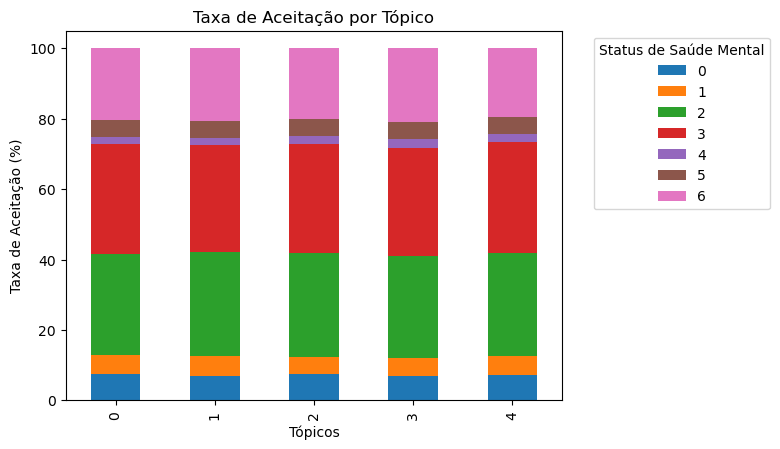

In [236]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  
lda.fit(X_train_vect)

for topic_idx, topic in enumerate(lda.components_):
    feature_names = vect.get_feature_names_out()
    print(f"Topico {topic_idx + 1}:", end=' ')
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

topic_assignments = lda.transform(X_train_vect)
topic_indices = np.argmax(topic_assignments, axis=1)  

topic_df = pd.DataFrame({'text': X_train, 'topic': topic_indices, 'label': y_train})

acceptance_rate = topic_df.groupby('topic')['label'].value_counts(normalize=True).unstack(fill_value=0)

acceptance_rate_percentage = acceptance_rate * 100

print("\nTaxa de aceitação por tópico (em porcentagem):")
print(acceptance_rate_percentage)

acceptance_rate_percentage.plot(kind='bar', stacked=True)
plt.title('Taxa de Aceitação por Tópico')
plt.xlabel('Tópicos')
plt.ylabel('Taxa de Aceitação (%)')
plt.legend(title='Status de Saúde Mental', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No contexto de saúde mental, a aplicação a LDA (Latent Dirichlet Allocation) revela como determinados estados emocionais ou de saúde mental estão associados a diferentes tópicos. Isso facilita a identificação de padrões de linguagem que podem estar correlacionados com condições como depressão, ansiedade ou pensamentos suicidas.

Analisando os tópicos então obtidos pelo script, tira-se as seguintes conclusões:

1. Tópico _year get go work time like would friend life depress_:
- Este tópico parece estar relacionado a questões de tempo, trabalho e vida em geral, com a palavra "depress" presente, sugerindo uma ligação com a depressão. A taxa de aceitação mais alta é para Suicidal (31.22%) e Depression (28.87%). Isso indica que este tópico está fortemente associado a indivíduos que expressam sentimentos depressivos ou pensamentos suicidas, possivelmente em relação a questões de trabalho e vida cotidiana.

2. Tópico _im anxieti feel ive get day like go time start_:
- O foco neste tópico está nas palavras "anxiety" e "feel", sugerindo uma ligação direta com a ansiedade. A maior taxa de aceitação é para Suicidal (30.47%) e Depression (29.66%). Este resultado pode fazer sentido, pois sentimentos de ansiedade podem coexistir com estados depressivos e suicidas, como indicado pelas palavras-chave.

3. Tópico _want feel like life cannot go know get fuck even_:
- Este tópico reflete uma forte sensação de frustração e desamparo, com termos como "cannot", "life", e "fuck". Os rótulos mais representados são Suicidal (31.19%) e Depression (29.33%), novamente, o que reforça a ideia de que este tópico reflete um estado emocional negativo e possivelmente extremo.

4. Tópico _feel im like dont peopl know thing think make want_:
- Palavras como "feel", "like", "dont", e "peopl" indicam um possível sentimento de desconexão social e alienação. Este tópico tem a maior taxa de aceitação em Suicidal (30.60%) e Depression (29.05%). Aqui, já é possível perceber a disparidade no qual essas classes são postas em comparação com outras, e também a subjetividade envolvida no estudo das diferenças entre os status de saúde mental, que são nuances que fazem toda a diferença.

5. Tópico _fuck oh http get ye world co god thank buy_:
- Este tópico tem uma mistura peculiar de palavras informais e religiosas, o que pode refletir um estado emocional confuso ou intenso. Mais uma vez, o maior percentual é de Suicidal (31.61%) e Depression (29.32%). A presença de termos como "fuck" e "god" pode indicar uma oscilação entre sentimentos de revolta e uma busca por significado.

Como sabemos que o dataset original é composto por 31% de documentos do tipo Normal, 29% de Depression, e 40% dos demais estados mentais, percebe-se uma disparidade em relação às porcentagens de cada tópico. Em todos os tópicos, observamos que as categorias Suicidal e Depression dominam, enquanto Normal aparece com uma frequência menor, o que indica que os tópicos descobertos pelo LDA estão mais focados em estados emocionais graves. A categoria Normal está pouco representada em relação à sua proporção original no conjunto de dados, o que pode sugerir que o LDA está capturando principalmente textos carregados de emoções mais intensas. Isso pode ser indicativo da natureza dos dados, onde emoções mais severas são expressas com mais clareza em termos de padrões de linguagem.

## Classificação em Duas Camadas

In [268]:
classifiers = {}

for topic in range(lda.n_components):
    topic_data = topic_df[topic_df['topic'] == topic] 
    
    if not topic_data.empty:
        X_topic_dtm = vect.transform(topic_data['text'])
        
        X = X_topic_dtm
        y = topic_data['label']
        X_topic_train, X_topic_test, y_topic_train, y_topic_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_topic_train, y_topic_train)
    
        y_topic_pred = clf.predict(X_topic_test)
        print(f"Relatório sobre a classificação do tópico {topic}:")
        print(classification_report(y_topic_test, y_topic_pred))
    
        classifiers[topic] = clf

new_topic_assignments = lda.transform(X_test_vect)
final_predictions = []

for i in range(X_test_vect.shape[0]):
    assigned_topic = np.argmax(new_topic_assignments[i])
    
    if assigned_topic in classifiers:
        clf = classifiers[assigned_topic]
        X_doc_dtm = X_test_vect[i]
    
        prediction = clf.predict(X_doc_dtm)
        final_predictions.append(prediction)
    
    else:
        final_predictions.append(-1)

Classification report for topic 0:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       141
           1       0.76      0.60      0.67       108
           2       0.67      0.69      0.68       577
           3       0.86      0.94      0.90       589
           4       0.73      0.49      0.58        39
           5       0.61      0.52      0.56       100
           6       0.60      0.59      0.60       382

    accuracy                           0.73      1936
   macro avg       0.71      0.64      0.67      1936
weighted avg       0.73      0.73      0.73      1936

Classification report for topic 1:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        99
           1       0.67      0.56      0.61        80
           2       0.66      0.65      0.65       461
           3       0.84      0.93      0.88       430
           4       0.47      0.20      0.28        40
        

### Performance dos Classificadores de Cada Tópico
Para cada tópico (0 a 4), temos os relatórios de desempenho, que incluem precisão, revocação, e f1-score para diferentes classes.

- Tópico 0:
    + Acurácia: 0.73
    + Observações:
        + Classe dominante: Classe 3 (acurácia de 0.94), sugere que esta classe é facilmente distinguível.
        + Classes com menor desempenho: Classe 4 (f1-score de 0.58) e 5 (f1-score de 0.56), com menor recall (0.49 e 0.52, respectivamente).
        + Desempenho geral sólido, mas há um desbalanceamento entre classes.

- Tópico 1:
    + Acurácia: 0.70
    + Observações:
        + Classe dominante: Classe 3 (f1-score de 0.88), novamente com ótimo desempenho.
        + Classes problemáticas: Classe 4 (f1-score de 0.28) e 5 (f1-score de 0.53), com baixo recall (0.20 e 0.51).
        + Mostra um desempenho equilibrado, mas classes minoritárias sofrem de baixa precisão e recall.

- Tópico 2:
    + Acurácia: 0.72
    + Observações:
        + Classe dominante: Classe 3 (f1-score de 0.89) com excelente precisão e recall.
        + Classes problemáticas: Classe 4 (f1-score de 0.48) e 5 (f1-score de 0.47), indicando dificuldade em diferenciar essas classes.
        + O desempenho geral é bom, mas as classes minoritárias novamente afetam a média ponderada.

- Tópico 3:
    + Acurácia: 0.68
    + Observações:
        + Classe dominante: Classe 3 (f1-score de 0.86).
        + Classes problemáticas: Classe 4 (f1-score de 0.43) e 5 (f1-score de 0.43), com baixo recall (0.37 e 0.36, respectivamente).
        + Acurácia um pouco menor, indicando que o classificador deste tópico encontra mais dificuldade para prever classes minoritárias.

- Tópico 4:
    + Acurácia: 0.69
    + Observações:
        + Classe dominante: Classe 3 (f1-score de 0.87).
        + Classe problemática: Classe 4 (f1-score de 0.50), sugerindo desafios com classes menores e menos frequentes.

A análise de desempenho dos classificadores para cada tópico revela um padrão consistente na dificuldade em distinguir classes minoritárias, especialmente nas classes menos representadas. As acurácias gerais dos tópicos variam entre 0.68 e 0.73, indicando um desempenho razoável do modelo, mas o desbalanceamento entre as classes sugere que melhorias são necessárias na identificação de estados de saúde mental menos frequentes. A escolha de diferentes classificadores também contribuiu para a evolução do modelo, mas ainda é necessário explorar estratégias adicionais para lidar com as classes minoritárias, como técnicas de reamostragem ou ajuste de pesos. Este projeto destaca a importância de um pré-processamento robusto e de uma avaliação de desempenho equilibrada para garantir que todos os estados de saúde mental sejam representados de forma adequada nas previsões.